In [1]:
# Env: rive
# Audrey / Cindy /
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as pplt # New plot library (https://proplot.readthedocs.io/en/latest/)
pplt.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy import stats
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)
import calendar
import os
import tensorflow as tf # Machine learning

2024-01-11 12:53:33.949296: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError
import tensorflow.keras.backend as K
import pandas as pd
import numpy as np

# Chargement des librairies + données
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
cible = "turb"

echantillons = pd.read_csv("../AtlasDeLEau/qualite_eau_complet.csv")

qualite_eau = echantillons.copy()
qualite_eau['annee'] = pd.to_datetime(qualite_eau['date']).dt.year
qualite_eau['mois'] = pd.to_datetime(qualite_eau['date']).dt.month
qualite_eau = qualite_eau[(qualite_eau['mois'] >= 6) & (qualite_eau['mois'] <= 9) & (qualite_eau['annee'] >= 2016)]
qualite_eau['ID'] = qualite_eau['no_station'].astype(str) + "_" + qualite_eau['annee'].astype(str)
qualite_eau['nom_fichier'] = qualite_eau['ID'] + ".png"
qualite_eau = qualite_eau.dropna(subset=[cible])
qualite_eau[cible] = StandardScaler().fit_transform(qualite_eau[[cible]])

/tmp/ipykernel_28135/2207651141.py:3: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  echantillons = pd.read_csv("../AtlasDeLEau/qualite_eau_complet.csv")


In [4]:
qualite_eau[cible]

19812    -0.224416
19813     0.038005
19814     0.084044
19819     0.130083
19820     1.373133
            ...   
132713    0.222161
132714    0.038005
132717    0.820666
132718    0.728589
132719   -0.026449
Name: turb, Length: 9372, dtype: float64

In [5]:
qualite_eau

,no_labo,no_projet,no_station,date,heure,alc,cat,cf,chl_aa,clo,...,AS (mg/l),PHE (µg/l),TAN (mg/l),AG (mg/l),U (mg/l),P-T-66V (µg/l),annee,mois,ID,nom_fichier
19812,Q111972-99,210,06130005,2019-06-10T00:00:00Z,1000,NaN,18.0,3.0,4.73,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2019,6,06130005_2019,06130005_2019.png
19813,Q113254-06,210,06130005,2019-07-15T00:00:00Z,1010,NaN,27.0,5.0,4.51,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2019,7,06130005_2019,06130005_2019.png
19814,Q114228-99,210,06130005,2019-08-06T00:00:00Z,950,NaN,27.0,52.0,3.17,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2019,8,06130005_2019,06130005_2019.png
19819,Q120460-13,210,06130005,2020-07-13T00:00:00Z,1015,NaN,26.0,52.0,4.58,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020,7,06130005_2020,06130005_2020.png
19820,Q122442-21,210,06130005,2020-09-14T00:00:00Z,700,NaN,27.0,84.0,4.58,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020,9,06130005_2020,06130005_2020.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132713,Q114611-97,210,7710001,2019-08-13T00:00:00Z,912,NaN,15.0,430.0,2.28,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2019,8,7710001_2019,7710001_2019.png
132714,Q115919-20,210,7710001,2019-09-18T00:00:00Z,845,NaN,17.0,54.0,2.06,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2019,9,7710001_2019,7710001_2019.png
132717,Q120594-63,210,7710001,2020-07-14T00:00:00Z,1326,NaN,10.0,260.0,1.98,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020,7,7710001_2020,7710001_2020.png
132718,Q121526-38,210,7710001,2020-08-11T00:00:00Z,1627,NaN,12.0,900.0,1.60,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020,8,7710001_2020,7710001_2020.png


In [4]:
# Préparation des générateurs d'images
dossier_images = "../Imagerie/3km/"
colonne_noms_fichiers = "nom_fichier"
rescale_factor = 1/255
validation_fraction = 0.2
image_dimensions = (294, 201)
random_seed = int(np.round(np.random.uniform(0, 10000)))

train_data, val_data = train_test_split(qualite_eau, test_size=validation_fraction, random_state=random_seed)

In [7]:
train_data

,no_labo,no_projet,no_station,date,heure,alc,cat,cf,chl_aa,clo,...,AS (mg/l),PHE (µg/l),TAN (mg/l),AG (mg/l),U (mg/l),P-T-66V (µg/l),annee,mois,ID,nom_fichier
99196,Q090786-10,210,05150001,2016-08-15T00:00:00Z,1000,NaN,NaN,28.0,1.19,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016,8,05150001_2016,05150001_2016.png
69732,Q112992-08,210,03090001,2019-07-08T00:00:00Z,800,NaN,33.0,26.0,10.40,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2019,7,03090001_2019,03090001_2019.png
128157,Q106322-08,210,02270002,2018-08-14T00:00:00Z,545,NaN,NaN,82.0,1.58,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2018,8,02270002_2018,02270002_2018.png
102415,Q114450-54,210,05020005,2019-08-12T00:00:00Z,1022,NaN,18.0,6000.0,5.56,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2019,8,05020005_2019,05020005_2019.png
65866,Q121174-06,210,02330049,2020-08-03T00:00:00Z,1105,NaN,38.0,56.0,10.90,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020,8,02330049_2020,02330049_2020.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125183,Q091615-35,210,5250002,2016-09-13T00:00:00Z,1215,NaN,NaN,310.0,2.57,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016,9,5250002_2016,5250002_2016.png
70308,Q111996-23,210,04050001,2019-06-10T00:00:00Z,1610,NaN,13.0,25.0,2.29,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2019,6,04050001_2019,04050001_2019.png
31755,Q091305-29,210,3030199,2016-09-05T00:00:00Z,1920,NaN,NaN,110.0,5.70,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016,9,3030199_2016,3030199_2016.png
130130,Q104128-88,210,06290002,2018-06-12T00:00:00Z,930,NaN,NaN,1.0,1.03,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2018,6,06290002_2018,06290002_2018.png


In [8]:
val_data

,no_labo,no_projet,no_station,date,heure,alc,cat,cf,chl_aa,clo,...,AS (mg/l),PHE (µg/l),TAN (mg/l),AG (mg/l),U (mg/l),P-T-66V (µg/l),annee,mois,ID,nom_fichier
99962,Q090814-91,210,05010035,2016-08-16T00:00:00Z,1010,NaN,NaN,140.0,3.74,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016,8,05010035_2016,05010035_2016.png
62352,Q089812-34,210,04010001,2016-07-12T00:00:00Z,1742,NaN,NaN,470.0,1.73,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016,7,04010001_2016,04010001_2016.png
65157,Q096356-44,210,04030001,2017-06-12T00:00:00Z,1400,NaN,NaN,52.0,1.04,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2017,6,04030001_2017,04030001_2017.png
70376,Q129485-26,210,04060004,2021-08-17T00:00:00Z,1330,NaN,6.8,20.0,1.81,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2021,8,04060004_2021,04060004_2021.png
127306,Q096277-51,210,05020005,2017-06-12T00:00:00Z,1000,NaN,NaN,64.0,4.06,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2017,6,05020005_2017,05020005_2017.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129686,Q114576-79,210,05220012,2019-08-12T00:00:00Z,845,NaN,15.0,100.0,4.81,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2019,8,05220012_2019,05220012_2019.png
68013,Q111741-11,210,03030094,2019-06-03T00:00:00Z,1500,NaN,11.0,300.0,13.40,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2019,6,03030094_2019,03030094_2019.png
123176,Q091368-21,210,2340038,2016-09-06T00:00:00Z,1400,NaN,NaN,7.0,1.82,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2016,9,2340038_2016,2340038_2016.png
127979,Q114646-44,210,02340038,2019-08-14T00:00:00Z,1455,NaN,17.0,8.0,3.60,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2019,8,02340038_2019,02340038_2019.png


In [5]:
datagen = ImageDataGenerator(rescale=rescale_factor)

training_generator = datagen.flow_from_dataframe(
    train_data,
    directory=dossier_images,
    x_col=colonne_noms_fichiers,
    y_col=cible,
    target_size=image_dimensions,
    class_mode="other",
    subset="training",
    seed=random_seed
)

validation_generator = datagen.flow_from_dataframe(
    val_data,
    directory=dossier_images,
    x_col=colonne_noms_fichiers,
    y_col=cible,
    target_size=image_dimensions,
    class_mode="other",
    subset="validation",
    seed=random_seed
)

Found 5550 validated image filenames.
Found 0 validated image filenames.


/home/lalandmi/miniconda3/envs/rive/lib/python3.10/site-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 1947 invalid image filename(s) in x_col="nom_fichier". These filename(s) will be ignored.
  warnings.warn(
/home/lalandmi/miniconda3/envs/rive/lib/python3.10/site-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 469 invalid image filename(s) in x_col="nom_fichier". These filename(s) will be ignored.
  warnings.warn(


In [6]:
# Préparation et ajustement du modèle
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(image_dimensions[0], image_dimensions[1], 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, kernel_size=(3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, kernel_size=(3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(32, activation="relu"),
    Dense(1)
])

def r2(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - SS_res / (SS_tot + K.epsilon())

In [7]:
model.compile(optimizer="adam", loss="mse", metrics=["mae", r2])

In [8]:

# Exploration des résultats
history = model.fit(
    x=training_generator,
    validation_data=validation_generator,
    epochs=10,
    batch_size = 10
)

Epoch 1/10
174/174 [==============================] - 167s 945ms/step - loss: 0.9821 - mae: 0.4354 - r2: -0.0726
Epoch 2/10
174/174 [==============================] - 157s 901ms/step - loss: 0.8799 - mae: 0.4019 - r2: 0.0446
Epoch 3/10
174/174 [==============================] - 176s 1s/step - loss: 0.8137 - mae: 0.3634 - r2: 0.0283
Epoch 4/10
174/174 [==============================] - 231s 1s/step - loss: 0.7814 - mae: 0.3536 - r2: 0.1268
Epoch 5/10
174/174 [==============================] - 203s 1s/step - loss: 0.7541 - mae: 0.3451 - r2: 0.1140
Epoch 6/10
174/174 [==============================] - 221s 1s/step - loss: 0.7479 - mae: 0.3368 - r2: 0.1291
Epoch 7/10
174/174 [==============================] - 237s 1s/step - loss: 0.7327 - mae: 0.3398 - r2: 0.1366
Epoch 8/10
174/174 [==============================] - 240s 1s/step - loss: 0.7299 - mae: 0.3416 - r2: 0.0877
Epoch 9/10
174/174 [==============================] - 192s 1s/step - loss: 0.6946 - mae: 0.3244 - r2: 0.0646
Epoch 10/10


In [9]:
history.history

{'loss': [0.982065737247467,
  0.8799113035202026,
  0.8136902451515198,
  0.781366765499115,
  0.7540544271469116,
  0.7478606104850769,
  0.7327048182487488,
  0.7299249172210693,
  0.6946307420730591,
  0.7162110805511475],
 'mae': [0.4354206323623657,
  0.40193095803260803,
  0.36335280537605286,
  0.3535783886909485,
  0.34507444500923157,
  0.33679884672164917,
  0.3397639989852905,
  0.34157460927963257,
  0.324444055557251,
  0.3373018205165863],
 'r2': [-0.07259306311607361,
  0.044560857117176056,
  0.028268935158848763,
  0.12678495049476624,
  0.113976389169693,
  0.12911520898342133,
  0.1366330236196518,
  0.08769215643405914,
  0.06462036073207855,
  0.1526293307542801]}

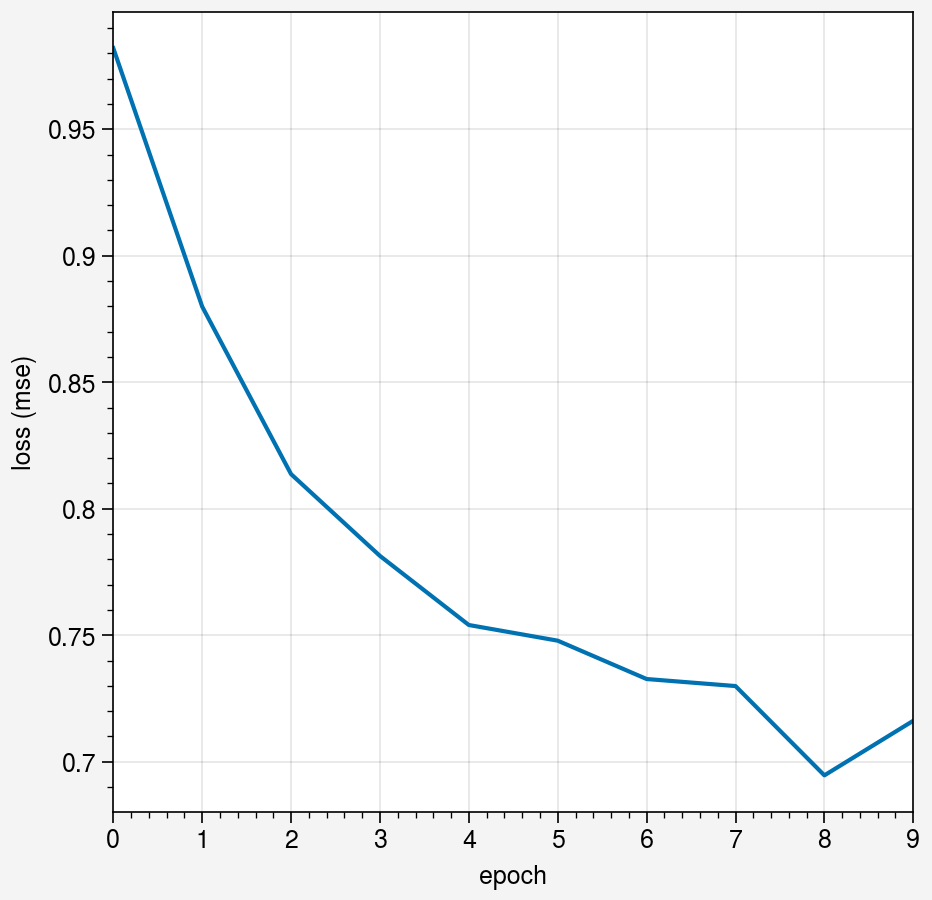

In [10]:
fig, axs = pplt.subplots(ncols=1, nrows=1, refwidth=4)

axs[0].plot(history.history['loss'])
axs[0].format(xlabel='epoch', ylabel='loss (mse)')